In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('datasets/penguins.csv')

data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [32]:
data.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [33]:
data.dropna(subset=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'], inplace=True)

In [34]:
data.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [35]:
data['sex'].value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [36]:
data = data[data['sex'] != '.'].copy()
data.loc[:, 'sex'] = data['sex'].map({'MALE': 0, 'FEMALE': 1})


In [37]:
data['sex'].value_counts()

sex
0    169
1    165
Name: count, dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler

features = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


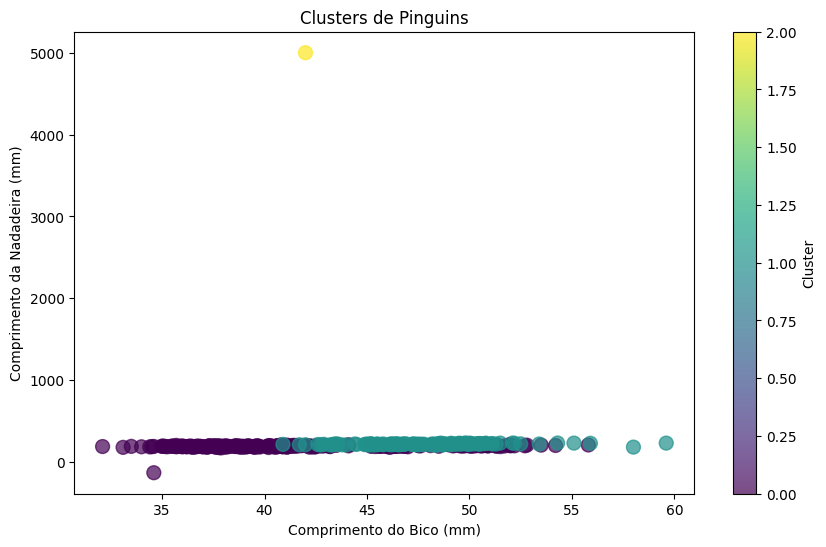

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(data['culmen_length_mm'], data['flipper_length_mm'], c=data['Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.xlabel('Comprimento do Bico (mm)')
plt.ylabel('Comprimento da Nadadeira (mm)')
plt.title('Clusters de Pinguins')
plt.colorbar(label='Cluster')
plt.show()

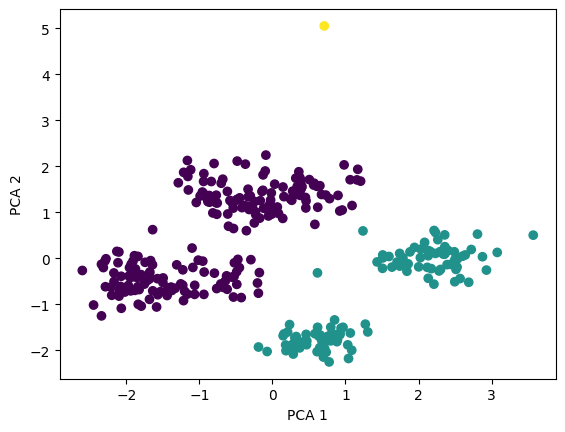

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
plt.scatter(pca_features[:,0], pca_features[:,1], c=data['Cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
